In [1]:
import networkx as nx
import metis
G = metis.example_networkx()
(edgecuts, parts) = metis.part_graph(G, 3)
colors = ['red','blue','green']
for i, p in enumerate(parts):
     G.node[i]['color'] = colors[p]

In [2]:
G.node

{0: {'color': 'red'},
 1: {'color': 'red'},
 2: {'color': 'red'},
 3: {'color': 'red'},
 4: {'color': 'red'},
 5: {'color': 'red'},
 6: {'color': 'blue'},
 7: {'color': 'green'},
 8: {'color': 'green'},
 9: {'color': 'green'},
 10: {'color': 'green'},
 11: {'color': 'green'},
 12: {'color': 'green'},
 13: {'color': 'blue'},
 14: {'color': 'blue'},
 15: {'color': 'blue'},
 16: {'color': 'blue'},
 17: {'color': 'blue'},
 18: {'color': 'blue'}}

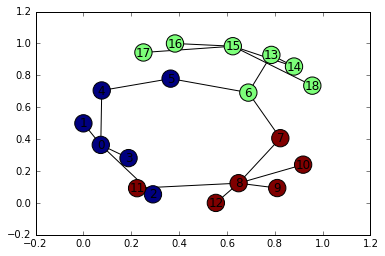

In [3]:
%matplotlib inline
nx.draw_networkx(G, node_color=parts)
#(G, 'example.dot') # Requires pydot or pygraphviz

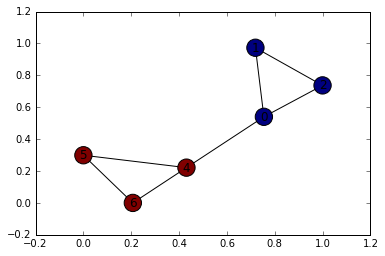

In [4]:
g2 = nx.Graph([(0,1), (0,2), (1,2), (0,4), (4,5), (4,6), (5,6)])
p2 = metis.part_graph(g2,2)
nx.draw_networkx(g2, node_color=p2[1])

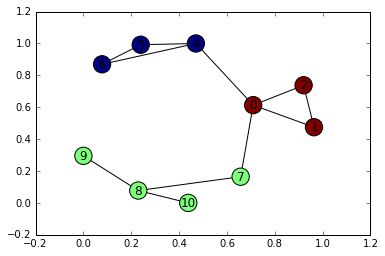

In [5]:
g3 = nx.Graph([(0,1), (0,2), (1,2), (0,4), 
               (4,5), (4,6), (5,6),
               (0, 7), (7, 8), (8,9), (8, 10)])
nx.draw_networkx(g3, node_color=metis.part_graph(g3,3)[1])

In [6]:
import numpy as np
import random

def gen_random_sparse(edges=100,
                      vertices=10,
                      seed=1234):
    
    random.seed(seed)
    
    a = np.random.randint(0, edges, vertices*edges)
    b = np.random.randint(0, edges, vertices*edges)
    
    return (a,b)

def gen_random_graph(edges=100,
                     vertices=10,
                     seed=1234):
    
    (a,b) = gen_random_sparse(edges, vertices, seed)
    
    g = nx.Graph(zip(a,b))
    
    return g

72


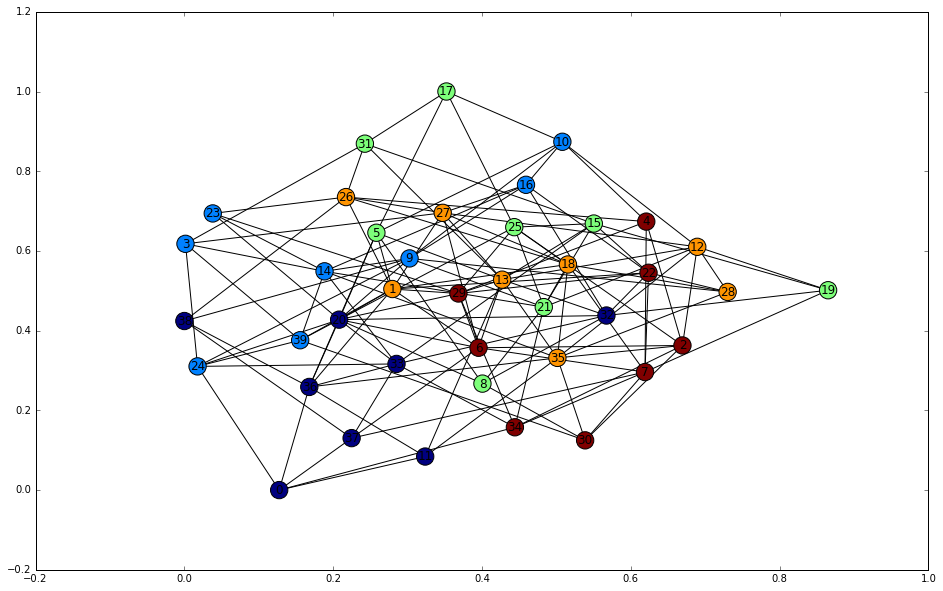

In [7]:
g = gen_random_graph(edges=40, vertices=4)

import pylab
pylab.rcParams['figure.figsize'] = (16.0, 10.0)

(c,p) = metis.part_graph(g, 5, objtype='cut', ufactor=100, contig=True, niter=20)

print(c)

nx.draw_networkx(g, node_color=p)

In [8]:
for i in range(10, 15):
    print(2**i)
    g = gen_random_graph(edges=2**i, vertices=20)
    %time metis.part_graph(g, int(2**i/10))

1024
CPU times: user 140 ms, sys: 0 ns, total: 140 ms
Wall time: 138 ms
2048
CPU times: user 284 ms, sys: 0 ns, total: 284 ms
Wall time: 285 ms
4096
CPU times: user 600 ms, sys: 8 ms, total: 608 ms
Wall time: 609 ms
8192
CPU times: user 1.33 s, sys: 8 ms, total: 1.34 s
Wall time: 1.34 s
16384
CPU times: user 2.93 s, sys: 24 ms, total: 2.95 s
Wall time: 2.95 s


In [9]:
# %time g_big = gen_random_graph(edges=2**20, vertices=40)

# %time (cuts, parts) = metis.part_graph(g_big, int(2**20/30))

In [10]:
import memory_profiler
%load_ext memory_profiler

n = 2**15

%time %memit gb = gen_random_graph(edges=n, vertices=30)

peak memory: 710.05 MiB, increment: 397.46 MiB
CPU times: user 2.56 s, sys: 136 ms, total: 2.7 s
Wall time: 2.82 s


In [11]:
gb.graph['node_weight_attr'] = 'weight'
for i in range(n): 
    gb.node[i]['weight'] = 1

In [22]:
%time (cuts, parts) = metis.part_graph(gb, int(n/20), iptype='random', ufactor=10000)

print (cuts, np.max(parts), int(n/20))

CPU times: user 5.72 s, sys: 64 ms, total: 5.78 s
Wall time: 5.78 s
897896 499 500


In [23]:
import pandas as pd

df = pd.DataFrame({'part': parts})
print(np.unique(parts))
gp = df.part.value_counts()
gp.describe()

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 101 102 103 104 105 106 107 108 109 110 111 112
 113 115 116 117 118 119 120 121 123 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 157 158 159 160 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 222 223 224 226 227 228 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 252 253 254 255 256 257 258 259 260 261 262 263 26

count    457.000000
mean      71.702407
std      206.468518
min        5.000000
25%        6.000000
50%        6.000000
75%        7.000000
max      720.000000
Name: part, dtype: float64

In [14]:
n = 10000
nadj = 20
adj = [tuple(i + np.random.randint(1, nadj, nadj)) for i in range(n-nadj)] + list([()] * nadj)
len(adj)

10000

%time (cuts, parts) = metis.part_graph(adj, int(n/20), iptype='random', ufactor=10000)
print(cuts, len(parts), len(np.unique(parts)))

x = np.zeros(10)
tuple(x)